In [2]:
import numpy as np
import os


from sklearn.linear_model import LinearRegression
from sklearn import mixture, metrics

from shapely.geometry import Polygon

from scipy.stats.distributions import norm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

from matplotlib import pyplot as plt
from matplotlib import cm

from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

from scipy import ndimage as ndi
from scipy.spatial import ConvexHull
from scipy.spatial import distance
from numpy import linalg

from skimage import io
from skimage.draw import ellipse
from skimage.color import rgb2gray
from skimage.morphology import disk, skeletonize, ball
from skimage import filters
from skimage.morphology import disk
from skimage import transform
from skimage.feature import peak_local_max
import skimage.segmentation as seg

from PIL import Image, ImageDraw, ImageFilter, ImageOps
import copy
import cv2

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage import distance_transform_edt as edt
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon


from src.utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology


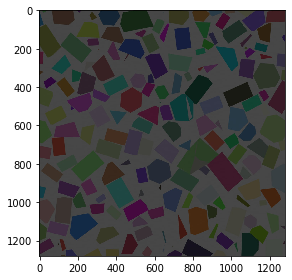

In [19]:
image=io.imread('data/artif/mixer/photo_2022-11-22_22-36-22.jpg')
# plt.figure(figsize=(10,10))
io.imshow(image)
plt.show()

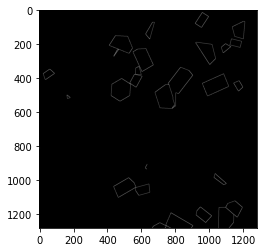

In [20]:
edges = cv2.Canny(image, 0, 255, L2gradient=False)

# plt.figure(figsize=(10,10))
plt.imshow(edges,cmap='gray')
plt.show()

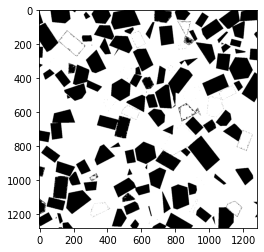

In [21]:
img = rgb2gray(image)*255

global_thresh = filters.threshold_otsu(img)
binary_global = img > global_thresh

# ax1.imshow(img,cmap='gray')
# plt.figure(figsize=(10, 10))
plt.imshow(binary_global, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Separated objects')

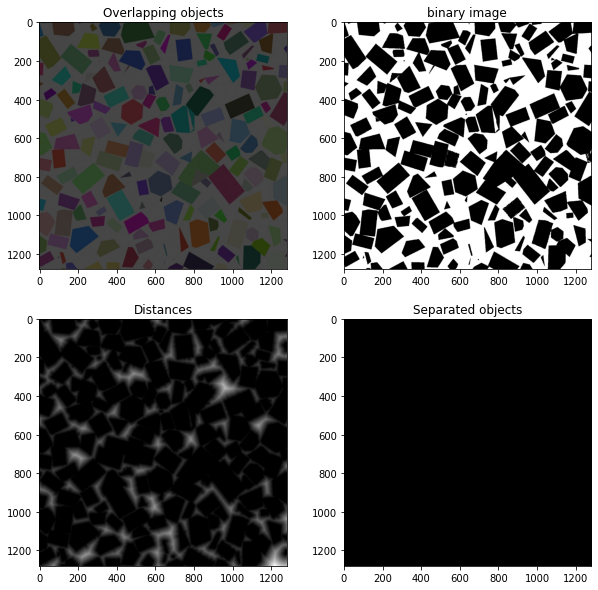

In [30]:
img = rgb2gray(image)*255
# global_thresh = filters.threshold_otsu(img)
global_thresh = 67
bin_image = img > global_thresh
bin_image=bin_image.astype(np.uint8)*255
# print(bin_image)

distance = ndi.distance_transform_edt(bin_image)
distance_copy = copy.copy(distance)

coords = peak_local_max(distance_copy, footprint=np.ones((3, 3)), labels=img.astype('int32')).astype('int64')

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

labels = seg.watershed(-distance, markers, mask=img)
labels = labels.astype('uint8')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')

ax[1].imshow(bin_image, cmap=plt.cm.gray)
ax[1].set_title('binary image')

ax[2].imshow(distance, cmap=plt.cm.gray)
ax[2].set_title('Distances')

ax[3].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[3].set_title('Separated objects')

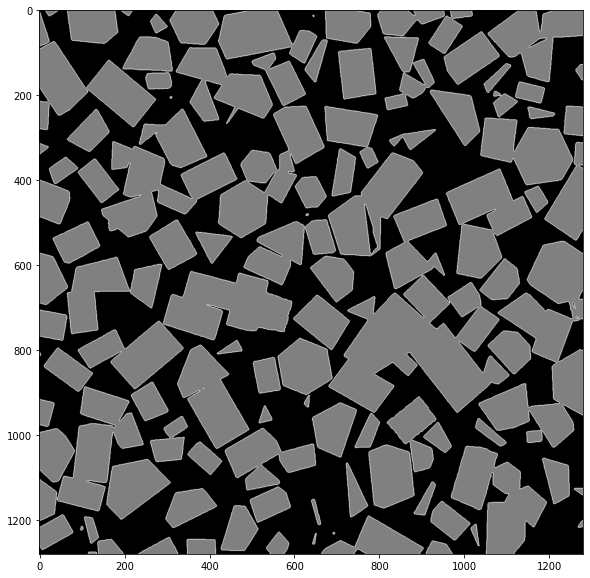

In [31]:
img = rgb2gray(image)*255
# global_thresh = filters.threshold_otsu(img)
global_thresh = 67
bin_image = img > global_thresh
bin_image=bin_image.astype(np.uint8)*255

preproc_image=grainPreprocess.image_preprocess(bin_image)

# ax1.imshow(img,cmap='gray')
plt.figure(figsize=(10, 10))
plt.imshow(preproc_image, cmap='gray')
plt.show()